<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module4/GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Genetic Algorithm (GA)**

Genetic Algorithm (GA) is an **optimization technique** inspired by the process of **natural selection**. It is used to solve complex search and optimization problems by mimicking evolutionary principles.

## **How It Works**
1. **Initialize Population**: Generate random candidate solutions.
2. **Evaluate Fitness**: Assess how good each solution is.
3. **Selection**: Choose the best solutions for reproduction.
4. **Crossover (Recombination)**: Combine two solutions to create offspring.
5. **Mutation**: Introduce small changes to maintain diversity.
6. **Repeat** until the best solution is found.

## **Key Advantages**
✅ Handles **complex, non-linear** problems.  
✅ Works **without requiring gradients**.  
✅ Avoids **local minima** using mutation.  
✅ **Widely used** in optimization, AI, and engineering.

## **Mathematical Representation**
Each solution (chromosome) is represented as a vector:

$$ X = [x_1, x_2, x_3, \dots, x_n] $$

The **fitness function** evaluates how good a solution is:

$$ f(X) \to \max $$

The goal is to evolve **X** over multiple generations to find the optimal solution.

---

### **Applications of Genetic Algorithms**
- **Optimization** (e.g., scheduling, logistics)
- **Machine Learning** (e.g., feature selection, hyperparameter tuning)
- **Engineering Design** (e.g., neural architecture search)
- **Finance** (e.g., portfolio optimization)
- **Game AI** (e.g., evolving game strategies)


#Code

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [10]:
random.seed(0)

##Data

In [2]:
df = pd.read_csv('./advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


We will use Genetic Algorithm to maximize:
$$
sale = \theta_1 * TV + \theta_2 * Radio + \theta_3 * Newspaper + \theta_4
$$

In [8]:
features_X = df.iloc[: , :3].to_numpy()
features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))

sales_Y = df.iloc[: , 3].to_numpy()

print(features_X[:5,:])
print(sales_Y.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


##Implementation

###Core components

In [52]:
def generate_random_value(bound = 100):
    return (random.random() - 0.5)*bound

In [35]:
def create_individual(n = 4, bound = 10):
  individual = [generate_random_value(bound) for _ in range(n)]
  return individual

individual = create_individual ()
print ( individual )

[-4.790153792160812, 6.100556540260447, 0.9739860767117858, -9.719165996719621]


In [25]:
def compute_loss ( individual ) :
  theta = np.array(individual)
  y_hat = features_X.dot ( theta )
  loss = np.multiply ((y_hat - sales_Y), (y_hat - sales_Y)).mean()
  return loss

def compute_fitness ( individual ) :
  loss = compute_loss ( individual )
  fitness_value = 1/(loss + 1)
  return fitness_value

individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


In [27]:
def crossover ( individual1 , individual2 , crossover_rate = 0.9) :
  individual1_new = individual1 . copy ()
  individual2_new = individual2 . copy ()

  for i in range(len(individual1)):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]

  return individual1_new, individual2_new

individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [36]:
def mutate ( individual , mutation_rate = 0.05) :
  individual_m = individual . copy ()
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_m[i] = generate_random_value(10)
  return individual_m

before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [37]:
def initializePopulation ( m ) :
  population = [ create_individual () for _ in range ( m ) ]
  return population

In [38]:
def selection ( sorted_old_population , m = 100) :
  index1 = random . randint (0 , m -1)
  while True:
    index2 = random . randint (0 , m -1)
    if ( index2 != index1 ) :
      break

  individual_s = sorted_old_population [ index1 ]
  if index2 > index1 :
    individual_s = sorted_old_population [ index2 ]
  return individual_s

In [45]:
def create_new_population(old_population, elitism = 2, gen = 1):
  m = len ( old_population )
  sorted_population = sorted (old_population , key = compute_fitness)

  if gen % 1 == 0:
    print ("Best loss: ", compute_loss(sorted_population[m -1]),
           " with chromsome: ", sorted_population [m -1])
    new_population = []
  while len ( new_population ) < m - elitism:
    #Selection
    individual1 = selection(sorted_population, m)
    individual2 = selection(sorted_population, m)
    #Crossover
    individual1_new, individual2_new = crossover(individual1, individual2)
    #Mutation
    individual1_new = mutate(individual1_new)
    individual2_new = mutate(individual2_new)
    #Add to the new population
    new_population.append(individual1_new)
    new_population.append(individual2_new)

  # copy elitism chromosomes that have best fitness score to the next generation
  for ind in sorted_population[m - elitism: ]:
    new_population.append(ind)
  return new_population, compute_loss ( sorted_population [m -1])

In [46]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss:  123415.05152880498  with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [53]:
def run_GA():
  n_generations = 100
  m = 600
  population = initializePopulation ( m )
  losses_list = []
  for i in range (n_generations):
    new_population, loss = create_new_population(population, elitism = 2,
                                                 gen = i)
    population = new_population
    losses_list.append(loss)
  return population, losses_list

###Visualize

In [48]:
def visualize_loss(losses_list):
  plt.plot(losses_list)
  plt.xlabel('Generation')
  plt.ylabel('Loss')
  plt.title('Loss vs Generation')
  plt.show()

Best loss:  1505.5047227224952  with chromsome:  [-2.4897510324823537, 0.1784449742034988, 0.6929874796975011, 0.32538594629655027]
Best loss:  802.0597516341072  with chromsome:  [-4.024734029204291, -0.07960920051039655, 1.6229164309697897, -0.6769222893950355]
Best loss:  802.0597516341072  with chromsome:  [-4.024734029204291, -0.07960920051039655, 1.6229164309697897, -0.6769222893950355]
Best loss:  246.700901106648  with chromsome:  [-2.4897510324823537, 0.1784449742034988, -0.6901770249979988, 0.32538594629655027]
Best loss:  246.700901106648  with chromsome:  [-2.4897510324823537, 0.1784449742034988, -0.6901770249979988, 0.32538594629655027]
Best loss:  246.700901106648  with chromsome:  [-2.4897510324823537, 0.1784449742034988, -0.6901770249979988, 0.32538594629655027]
Best loss:  246.700901106648  with chromsome:  [-2.4897510324823537, 0.1784449742034988, -0.6901770249979988, 0.32538594629655027]
Best loss:  123.95582634684314  with chromsome:  [4.432831648971364, 0.068091858

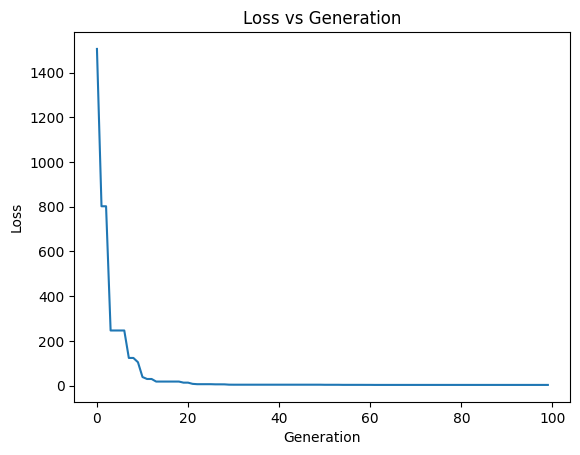

In [54]:
population, losses_list = run_GA ()
visualize_loss ( losses_list )

[3.6269340476853493, 0.06311534667820307, 0.11644382941016329, -0.015999176071537224]


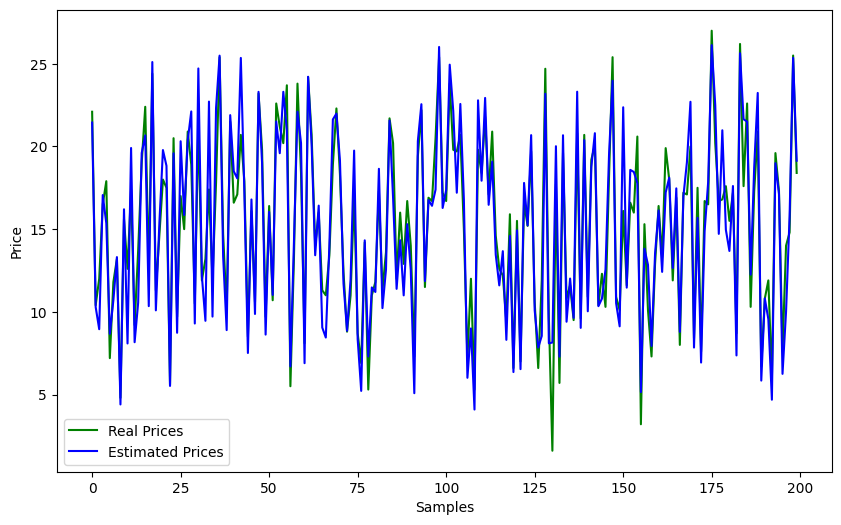

In [56]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted ( population , key = compute_fitness )
  print ( sorted_population [ -1])
  theta = np . array ( sorted_population [ -1])

  estimated_prices = []
  for feature in features_X:
    estimated_price = np.dot ( theta , feature )
    estimated_prices.append ( estimated_price )

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()